# 단국대 따릉이 대여량 

### train/test
- train : 2018-01-01 ~ 2020-12-31(3년치) (1095, 13) IN:2020-02-29, Out:2019-09-07
- test : 2021-01-01 ~ 2021-12-31(1년치) (365, 12)


### 독립변수
+ date: 날짜
+ precipitation: 강수량(mm)
+ temp_mean: 평균 기온(℃)
+ temp_highest: 최고 기온(℃)
+ temp_lowest: 최저 기온(℃)
+ PM10: 미세먼지(㎍/㎥)
+ PM2.5: 초미세먼지(㎍/㎥)
+ humidity: 습도(%rh)
+ sunshine_sum: 일조합
+ sunshine_rate: 일조율
+ wind_mean: 평균 풍속(m/s)
+ wind_max: 최대 풍속(m/s)

### 종속변수
+ rentals : 따릉이 대여량

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('./input/dankook/train.csv')
test = pd.read_csv('./input/dankook/test.csv')
train

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
0,2018-01-01,NaN,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950
1,2018-01-02,NaN,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136
2,2018-01-03,NaN,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156
3,2018-01-04,NaN,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102
4,2018-01-05,NaN,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2020-12-27,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103
1091,2020-12-28,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912
1092,2020-12-29,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747
1093,2020-12-30,NaN,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488


In [ ]:
test.info()

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 13 columns):
date             1095 non-null object
precipitation    417 non-null float64
temp_mean        1095 non-null float64
temp_highest     1095 non-null float64
temp_lowest      1095 non-null float64
PM10             1028 non-null float64
PM2.5            1027 non-null float64
humidity         1095 non-null float64
sunshine_sum     1090 non-null float64
sunshine_rate    1095 non-null float64
wind_mean        1095 non-null float64
wind_max         1095 non-null float64
rental           1095 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 111.3+ KB


In [106]:
train.isnull().sum()

date               0
precipitation    678
temp_mean          0
temp_highest       0
temp_lowest        0
PM10              67
PM2.5             68
humidity           0
sunshine_sum       5
sunshine_rate      0
wind_mean          0
wind_max           0
rental             0
dtype: int64

### 결측치 처리


In [107]:
# 결측치 처리
def null(df):    
    df['precipitation'] = df['precipitation'].fillna(0)
    df['PM10'] = df['PM10'].fillna(df['PM10'].mean())
    df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].mean())
    df['sunshine_sum'] = df['sunshine_sum'].fillna(df['sunshine_sum'].mean())
    return df

train = null(train)
test = null(test)
train.head()

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
0,2018-01-01,0.0,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950
1,2018-01-02,0.0,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136
2,2018-01-03,0.0,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156
3,2018-01-04,0.0,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102
4,2018-01-05,0.0,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705


### 날짜 변환

In [108]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
train['year'] = train['date'].dt.year
test['year'] = test['date'].dt.year
train['month'] = train['date'].dt.month
test['month'] = test['date'].dt.month
train['day'] = train['date'].dt.day
test['day'] = test['date'].dt.day
train = train.drop(columns='date')
test = test.drop(columns='date')
test

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,year,month,day
0,0.0,-4.2,1.6,-9.8,30.0,17.0,64.0,6.5,67.7,2.0,4.1,2021,1,1
1,0.0,-5.0,-1.4,-8.4,34.0,12.0,38.5,9.0,93.8,2.6,5.4,2021,1,2
2,0.0,-5.6,-2.0,-9.1,39.0,14.0,45.0,5.5,56.7,2.0,4.5,2021,1,3
3,0.0,-3.5,0.3,-8.4,40.0,23.0,51.4,4.6,47.4,1.7,3.2,2021,1,4
4,0.0,-5.5,-2.1,-9.9,30.0,17.0,52.8,8.6,88.7,2.9,5.7,2021,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.0,-7.6,-3.9,-12.9,33.0,20.0,60.9,3.8,39.6,1.7,3.1,2021,12,27
361,0.0,-4.1,-0.9,-8.5,51.0,38.0,73.8,1.7,17.7,2.2,3.1,2021,12,28
362,0.2,0.4,5.9,-3.8,66.0,49.0,72.9,1.8,18.8,2.6,5.9,2021,12,29
363,0.0,-3.9,0.2,-6.8,30.0,17.0,48.5,7.3,76.0,3.3,6.6,2021,12,30


###  val 시도

#### rf

In [131]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 

X = train.drop(['rental'],axis=1)
y = train["rental"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True)

In [132]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_features=8, min_samples_leaf=1, n_estimators=590)
model.fit(X_train, y_train)
pred = model.predict(X_val)

In [123]:
# 11-2. 예시1
from sklearn.model_selection import GridSearchCV

param = [{'kernel' : ['linear'],
{'kernel' : ['rbf'], 
'gamma' : [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}]

model = RandomForestRegressor()
grid_search = GridSearchCV(model, param, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

grid_search.best_params_

neg = grid_search.best_score_ # Best score: -0.737
rmse = np.sqrt(-neg)

for param_name in sorted(param.keys()):
    print("\t%s: %r" % (param_name, model.best_estimator_.get_params()[param_name]))

Fitting 5 folds for each of 49 candidates, totalling 245 fits


ValueError: Invalid parameter C for estimator RandomForestRegressor(). Check the list of available parameters with `estimator.get_params().keys()`.

In [130]:
%%time
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=1217)
params = {'n_estimators': stats.randint(200, 1000),
          'max_features': stats.randint(4, 12),
          'min_samples_leaf': stats.randint(1, 5)}

# RandomizedSearchCV를 이용해 최적의 하이퍼파라미터 탐색
rand_cv = RandomizedSearchCV(rf, param_distributions = params, n_iter=10, 
                             cv = 3, random_state = 1217, n_jobs=-1)
rand_cv.fit(X_train, y_train)

# 최적의 하이퍼파라미터 값과 성능 출력
print('최적 하이퍼파라미터: ', rand_cv.best_params_)
print('최적 하이퍼파라미터의 성능(RMSE): {:.4f}'.format(np.sqrt(rand_cv.best_score_)))

최적 하이퍼파라미터:  {'max_features': 8, 'min_samples_leaf': 1, 'n_estimators': 590}
최적 하이퍼파라미터의 성능(RMSE): 0.9561
Wall time: 45.2 s


In [133]:
import numpy as np

def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

In [134]:
NMAE(y_val, pred)

0.21381712106313697

### xgb

#### 기본 xgb

In [147]:
%%time
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=1217)
xgb_model.fit(X_train, y_train)
pred1 = xgb_model.predict(X_val)
NMAE(y_val, pred1)

Wall time: 166 ms


0.1929053595279806

#### xgb + 랜덤서치

In [145]:
%%time
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV

xgb_model = XGBRegressor(random_state=1217)
params = {
    'n_estimators': [200, 500, 1000, 2000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth': [6, 7, 8], 
    'colsample_bytree': [0.8, 0.9, 1.0], 
    'subsample': [0.8, 0.9, 1.0],
}

# RandomizedSearchCV를 이용해 최적의 하이퍼파라미터 탐색
rand_cv = RandomizedSearchCV(xgb_model, param_distributions = params, n_iter=10, cv = 3, random_state = 1217, n_jobs=-1)
rand_cv.fit(X_train, y_train)

# 최적의 하이퍼파라미터 값과 성능 출력
print('최적 하이퍼파라미터: ', rand_cv.best_params_)
print('최적 하이퍼파라미터의 성능(RMSE): {:.4f}'.format(np.sqrt(rand_cv.best_score_)))

C:\Users\HOME\anaconda3\envs\dankook\lib\site-packages\joblib\externals\loky\process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


최적 하이퍼파라미터:  {'subsample': 0.9, 'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
최적 하이퍼파라미터의 성능(RMSE): 0.9671
Wall time: 17 s


In [148]:
%%time
import lightgbm as lgb

xgb = XGBRegressor(subsample=0.9, n_estimators=1000, max_depth=6, learning_rate=0.01, colsample_bytree=0.8,random_state=1217)
xgb.fit(X_train, y_train)
pred2 = xgb.predict(X_val)
NMAE(y_val, pred2)

Wall time: 1.18 s


0.19554718042361574

In [149]:
NMAE(y_val, (pred1+pred2)/2)

0.19190113819849675

In [156]:
# https://dacon.io/competitions/official/235736/codeshare/2877?page=1&dtype=recent
xgb_params = pd.read_csv('./input/dankook/hyperparameter_xgb.csv')
xgb_reg = XGBRegressor(n_estimators = 10000, eta = xgb_params.iloc[47,1], min_child_weight = xgb_params.iloc[47,2], 
                       max_depth = xgb_params.iloc[47,3], colsample_bytree = xgb_params.iloc[47,4], 
                       subsample = xgb_params.iloc[47,5], seed=0)

xgb_reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)],
        early_stopping_rounds=300,
       verbose=False)

pred5 = xgb_reg.predict(X_val)
NMAE(y_val, pred5)

0.18276694939078872

In [158]:
NMAE(y_val, (pred1+pred2+pred3+pred4+pred5)/5)

0.18735950479526048

### lgbm

#### 기본 lgbm

In [150]:
%%time
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(random_state=1217)
lgbm.fit(X_train, y_train)
pred3 = lgbm.predict(X_val)
NMAE(y_val, pred3)

Wall time: 85.8 ms


0.19887754523448536

#### lgbm + 랜덤서치

In [142]:
%%time
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV

lgbm = lgb.LGBMRegressor(random_state=1217)
params = {
    'n_estimators': [200, 500, 1000, 2000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth': [6, 7, 8], 
    'colsample_bytree': [0.8, 0.9, 1.0], 
    'subsample': [0.8, 0.9, 1.0],
}

# RandomizedSearchCV를 이용해 최적의 하이퍼파라미터 탐색
rand_cv = RandomizedSearchCV(lgbm, param_distributions = params, n_iter=10, cv = 3, random_state = 1217, n_jobs=-1)
rand_cv.fit(X_train, y_train)

# 최적의 하이퍼파라미터 값과 성능 출력
print('최적 하이퍼파라미터: ', rand_cv.best_params_)
print('최적 하이퍼파라미터의 성능(RMSE): {:.4f}'.format(np.sqrt(rand_cv.best_score_)))

최적 하이퍼파라미터:  {'subsample': 0.9, 'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
최적 하이퍼파라미터의 성능(RMSE): 0.9653
Wall time: 6.76 s


In [151]:
%%time
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(subsample=0.9, n_estimators=1000, max_depth=6, learning_rate=0.01, colsample_bytree=0.8,random_state=1217)
lgbm.fit(X_train, y_train)
pred4 = lgbm.predict(X_val)
NMAE(y_val, pred4)

Wall time: 466 ms


0.19640525966787967

In [152]:
NMAE(y_val, (pred1+pred2+pred3+pred4)/4)

0.18975235731772788

### 모델링

In [109]:
X_train = train.drop(columns='rental')
X_train

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,year,month,day
0,0.0,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,2018,1,1
1,0.0,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,2018,1,2
2,0.0,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,2018,1,3
3,0.0,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,2018,1,4
4,0.0,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,2018,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,2020,12,27
1091,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,2020,12,28
1092,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,2020,12,29
1093,0.0,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,2020,12,30


In [110]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=0)
model.fit(X_train, train['rental'])
pred = model.predict(test)
pred

array([ 23995.04141794,  25114.30285569,  25044.12427381,  27222.419789  ,
        24516.07706993,  20830.85491642,  23514.62439376,  23742.38631221,
        25015.91206993,  27688.58285177,  24385.59253468,  17293.66857662,
        25520.53267066,  25295.23865876,  24571.40777911,  24408.9975808 ,
        24330.53367531,  18551.36556406,  25473.67642943,  26599.33872407,
        15461.76027814,  18199.378     ,  30460.54666667,  39573.1818839 ,
        40097.43560612,  15625.87903788,  24469.58893131,  17143.67764481,
        22598.88946275,  20060.01806907,  27537.0308064 ,  22472.5970724 ,
        24400.67061969,  18644.46270228,  20914.3338991 ,  22194.11052598,
        28747.77035583,  26201.89200722,  24535.38816334,  23207.87597965,
        23315.51049661,  34755.21192245,  38936.6106016 ,  45059.99618277,
        37932.89877778,  18013.62198752,  17820.85031247,  23442.2353181 ,
        24312.33006275,  26428.06074606,  44372.33488909,  58103.8858692 ,
        30156.41338866,  

In [111]:
submission = pd.read_csv('./input/dankook/sample_submission.csv')
submission['rental'] = pred
submission.to_csv('./output/dankook/dankook6.csv', index=False)
submission

,date,rental
0,2021-01-01,23995.041418
1,2021-01-02,25114.302856
2,2021-01-03,25044.124274
3,2021-01-04,27222.419789
4,2021-01-05,24516.077070
...,...,...
360,2021-12-27,28268.066742
361,2021-12-28,27186.223738
362,2021-12-29,39766.063218
363,2021-12-30,24602.555905


In [112]:
import numpy as np

def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

In [113]:
NMAE(, pred)

NameError: name 'val_y' is not defined

### Time_Series로 변환

In [54]:
# 데이터프레임을 Series로 변환하는 함수
def time_series(df):
    index1 = pd.date_range(min(df['date']), '2019-09-06')
    index2 = pd.date_range('2019-09-08', max(df['date']))
    ts1 = pd.Series(df['rental'][:len(index1)].values, index=index1)
    ts2 = pd.Series(df['rental'][len(index1):len(train)].values, index=index2)
    ts = pd.concat([ts1, ts2])
    return ts

<AxesSubplot:>

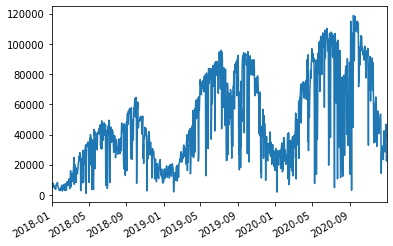

In [55]:
#plt.figure(figsize=(15,6))
time_series(train).plot()

### 정상성 확인(차분 필요여부)

In [6]:
# pmdarima 패키지에 있는 ADFTest 클래스를 임포트
from pmdarima.arima import ADFTest

# ADF-Test 시행
p_val, should_diff = ADFTest().should_diff(time_series(train))
print('p_val : %f , should_diff : %s' %(p_val, should_diff))

p_val : 0.218787 , should_diff : True


### 파이썬에서 R 시계열 패키지 forecast를 통한 모델링

In [7]:
from rpy2.robjects.packages import importr # rpy2 내의 패키지를 불러올 importr 클래스

utils = importr('utils') # utils 패키지를 임포트
utils.install_packages('forecast') # r의 forecast 패키지 설치.
utils.install_packages('forecastHybrid') # r의 forecastHybrid 패키지 설치


rpy2.rinterface.NULL

In [18]:
utils.install_packages('Zoo')

rpy2.rinterface.NULL

In [37]:
%%time
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈

# pandas2ri를 활성화 
pandas2ri.activate()

auto_arima = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        d_params = ndiffs(ts) # 시계열 자료의 차분 횟수 계산
        model = auto.arima(ts, max.p=2, d=d_params) # auto.arima 모델 생성
        forecasted_data = forecast(model, h=365) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('rental') # amount라는 열로 이름을 지정
        out_df
    }
"""
# r() 함수로 r 자료형을 파이썬에서 사용 가능
auto_arima = robjects.r(auto_arima)
ts = robjects.r('ts')# r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수
#zoo = robjects.r('zoo')

start_year = int(min(train['date'])[:4]) # 영업 시작 년도
start_month = int(min(train['date'])[5:7]) # 영업 시작 월
    
# R의 ts 함수로 r의 time series 자료형으로 변환
train = ts(train['rental'], start=c(start_year, 0), frequency=365) 

#ensemble model
forecast = auto_arima(train)
a = (pandas2ri.ri2py(forecast).values) # 3개월 매출을 합산

C:\Users\HOME\anaconda3\envs\dankook\lib\site-packages\rpy2-2.9.4-py3.7-win-amd64.egg\rpy2\robjects\pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


array([[ 39933.10411361,  13637.0960067 ,  66229.11222053,
          -283.16982525,  80149.37805248],
       [ 42188.28994381,  14296.49793224,  70080.08195539,
          -468.52487092,  84845.10475855],
       [ 37130.67852744,   9094.15804744,  65167.19900745,
         -5747.47937897,  80008.83643385],
       ...,
       [ 47758.05378832,   8751.00021173,  86765.10736491,
        -11898.08663444, 107414.19421108],
       [ 34499.05378832,  -4531.8832869 ,  73529.99086354,
        -25193.61329353,  94191.72087017],
       [ 36546.05378832,  -2508.75217986,  75600.8597565 ,
        -23183.11761518,  96275.22519182]])

In [45]:
%%time
a = (pandas2ri.ri2py(forecast).values)
a.shape
a = a.mean(axis=1)
a

Wall time: 1.41 ms


array([ 39933.10411361,  42188.28994381,  37130.67852744,  34717.09634585,
        26958.11822573,  13556.55226067,  33209.39453015,  40442.43062743,
        41164.45484698,  35048.31274316,  31672.70097892,  38641.22868614,
        40311.42062058,  40285.73049888,  40936.55026345,  41550.21856802,
        36571.02800686,  29628.23138259,  40566.04711697,  42580.66392681,
        44980.24486377,  46440.93080476,  31209.84346766,  27217.08801696,
        34672.75531494,  28826.92386678,  44091.66150108,  49986.02682188,
        50077.07046317,  47856.8361728 ,  39152.36174899,  34386.67984947,
        41684.81869058,  35010.80265128,  32316.65279504,  34407.38732073,
        38547.0219522 ,  34053.5702749 ,  33107.04402666,  45964.45334901,
        52571.80700423,  22707.11256296,  46384.37656623,  53238.60466551,
        41846.80174369,  18807.97201958,  25787.11913825,  31783.24624903,
        44731.35607297,  48037.45096104,  41789.5329445 ,  30300.60377836,
        37169.66497893,  

In [46]:
submission = pd.read_csv('./input/dankook/sample_submission.csv')
submission['rental'] = a
submission.to_csv('./output/dankook/dankook1.csv', index=False)
submission

,date,rental
0,2021-01-01,39933.104114
1,2021-01-02,42188.289944
2,2021-01-03,37130.678527
3,2021-01-04,34717.096346
4,2021-01-05,26958.118226
...,...,...
360,2021-12-27,49114.053788
361,2021-12-28,58923.053788
362,2021-12-29,47758.053788
363,2021-12-30,34499.053788


###  시계열 모델 선택과 검증
#### 자기회귀누적이동평균 모델

#### 지수평활법

In [56]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈

# pandas2ri를 활성화 
pandas2ri.activate()

ets = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        model = ets(ts) # AIC가 낮은 지수평활 모델을 찾음 
        forecasted_data = forecast(model, h=365) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
        out_df
    }
"""
# r() 함수로 r 자료형을 파이썬에서 사용 가능
ets = robjects.r(ets)# str 형식으로 정의된 ets
ts = robjects.r('ts')# r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수

    
# R의 ts 함수로 r의 time series 자료형으로 변환
ts_train2 = ts(train['rental'], start=c(2018, 0), frequency=365) 

#ensemble model
forecast = auto_arima(ts_train2)
b = (pandas2ri.ri2py(forecast).values) # 3개월 매출을 합산

In [57]:
submission = pd.read_csv('./input/dankook/sample_submission.csv')
submission['rental'] = b
submission.to_csv('./output/dankook/dankook2.csv', index=False)
submission

,date,rental
0,2021-01-01,39933.104114
1,2021-01-02,42188.289944
2,2021-01-03,37130.678527
3,2021-01-04,34717.096346
4,2021-01-05,26958.118226
...,...,...
360,2021-12-27,49114.053788
361,2021-12-28,58923.053788
362,2021-12-29,47758.053788
363,2021-12-30,34499.053788


#### STL 분해를 적용한 지수평활법

C:\Users\HOME\anaconda3\envs\dankook\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


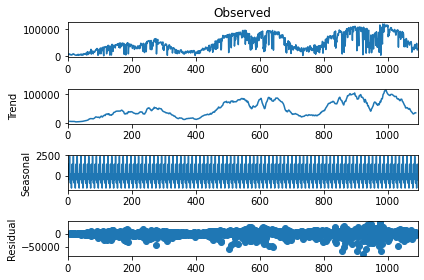

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

t_train = time_series(train)
# STL 분해
stl = seasonal_decompose(t_train.values, freq=12)
stl.plot()
plt.show()

In [59]:
%%time

import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈

# pandas2ri를 활성화 
pandas2ri.activate()
stlm = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        model = stlm(ts, s.window="periodic", method='ets') # STL 분해 후 지수평활법을 통한 예측 
        forecasted_data = forecast(model, h=365) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
        out_df
    }
"""
ets = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        model = ets(ts) # AIC가 낮은 지수평활 모델을 찾음 
        forecasted_data = forecast(model, h=365) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
        out_df
    }
"""
# r() 함수로 r을 파이썬에서 사용 가능
stlm = robjects.r(stlm)# str 형식으로 정의된 stlm
ets = robjects.r(ets)# str 형식으로 정의된 ets
ts = robjects.r('ts')# r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수

# R의 ts 함수로 r의 time series 자료형으로 변환
ts_train3 = ts(train['rental'], start=c(2018, 0), frequency=365) 

#ensemble model
forecast = auto_arima(ts_train3)
c = (pandas2ri.ri2py(forecast).values) # 3개월 매출을 합산

Wall time: 39min 30s


In [60]:
submission = pd.read_csv('./input/dankook/sample_submission.csv')
submission['rental'] = c
submission.to_csv('./output/dankook/dankook3.csv', index=False)
submission

,date,rental
0,2021-01-01,39933.104114
1,2021-01-02,42188.289944
2,2021-01-03,37130.678527
3,2021-01-04,34717.096346
4,2021-01-05,26958.118226
...,...,...
360,2021-12-27,49114.053788
361,2021-12-28,58923.053788
362,2021-12-29,47758.053788
363,2021-12-30,34499.053788


<AxesSubplot:>

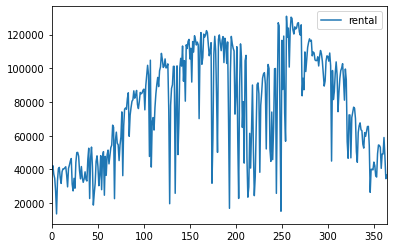

In [61]:
submission.plot()

## 성능 향상을 위한 방법
###  상점 매출액의 로그 정규화

In [51]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈
import numpy as np

# pandas2ri를 활성화 
pandas2ri.activate()

auto_arima = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        d_params = ndiffs(ts) # 시계열 자료의 차분 횟수 계산
        model = auto.arima(ts, max.p=2, d=d_params) # auto.arima 모델 생성
        forecasted_data = forecast(model, h=365) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
        out_df
    }
"""

# r() 함수로 r 자료형을 파이썬에서 사용 가능
auto_arima = robjects.r(auto_arima)
ts = robjects.r('ts')# r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수
log = robjects.r('log')# 로그 변환 함수
exp = robjects.r('exp')# 로그 역변환 함수

# 0번 상점 추출
store_0 = resampling_data[resampling_data['store_id']==0]
start_year = int(min(store_0['year_month'])[:4]) # 영업 시작 년도
start_month = int(min(store_0['year_month'])[5:]) # 영업 시작 월

# train, test 분리
train = store_0[store_0.index <= len(store_0)-4]
test = store_0[store_0.index > len(store_0)-4]

# R의 ts 함수로 r의 time series 자료형으로 변환
train_log = ts(log(train['amount']), start=c(start_year, start_month), frequency=12) # log 정규화 
train = ts(train['amount'], start=c(start_year, start_month), frequency=12) # log 정규화를 하지 않음

# model arima
forecast_log = auto_arima(train_log)
forecast = auto_arima(train)

# pred
pred_log = np.sum(pandas2ri.ri2py(exp(forecast_log)).values) #로그 역변환 후 3개월 합산
pred = np.sum(pandas2ri.ri2py(forecast).values) #3개월 매출을 합산

# test(2018-12~2019-02)
test = np.sum(test['amount'])

# mae
print('log-regularization mae: ', abs(test-pred_log))
print('mae:', abs(test-pred))

log-regularization mae:  2401.9664819482714
mae: 25197.053143496625


In [52]:
# 매출 변동 계수를 구하는 함수
def coefficient_variation(df, i):
    cv_data = df.groupby(['store_id']).amount.std()/df.groupby(['store_id']).amount.mean()
    cv = cv_data[i]
    return cv

In [53]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈
import numpy as np

# pandas2ri를 활성화 
pandas2ri.activate()

ets = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        model = ets(ts) # AIC가 낮은 지수평활 모델을 찾음 
        forecasted_data = forecast(model, h=3) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
        out_df
    }
"""

# r() 함수로 r 자료형을 파이썬에서 사용 가능
ets = robjects.r(ets)
ts = robjects.r('ts') # r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수
log = robjects.r('log') # 로그 변환 함수
exp = robjects.r('exp')# 로그 역변환 함수

final_pred = []

for i in tqdm(resampling_data.store_id.unique()):
    store = resampling_data[resampling_data['store_id']==i]
    start_year = int(min(store['year_month'])[:4]) # 영업 시작 년도
    start_month = int(min(store['year_month'])[5:]) # 영업 시작 월
    
    cv = coefficient_variation(resampling_data, i)
    # 매출액 변동 계수가 0.3 미만인 경우만 log를 씌움
    if cv < 0.3:
        train_log = ts(log(store['amount']), start=c(start_year,start_month), frequency=12) 
        # ets model
        forecast_log = ets(train_log)
        final_pred.append(np.sum(pandas2ri.ri2py(exp(forecast_log)).values))
    # 매출액 변동 계수가 0.3 이상인 경우
    else:
        train = ts(store['amount'], start=c(start_year,start_month), frequency=12)
        # 지수평활법
        forecast = ets(train)
        final_pred.append(np.sum(pandas2ri.ri2py(forecast).values)) 

100%|██████████████████████████████████████████████████████████████████████████████| 1967/1967 [48:06<00:00,  1.47s/it]


In [54]:
submission = pd.read_csv('./submission.csv')
submission['amount'] = final_pred
submission.to_csv('submission4.csv', index=False)
submission

,store_id,amount
0,0,1.963401e+06
1,1,2.483335e+05
2,2,1.260318e+06
3,4,2.660373e+06
4,5,7.091162e+05
...,...,...
1962,2132,2.122653e+06
1963,2133,3.488475e+05
1964,2134,4.249576e+05
1965,2135,1.603989e+06


### 4.5.2.	파이썬에서 R 시계열 패키지 forecastHybrid를 통한 앙상블

In [55]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈
import numpy as np

# pandas2ri를 활성화 
pandas2ri.activate()

hybridModel = """
    function(ts){
        library(forecast)
        library(forecastHybrid)
        d_params=ndiffs(ts)
        hb_mdl<-hybridModel(ts, models="aes", # auto_arima, ets, stlm
                        a.arg=list(max.p=2, d=d_params), # auto_arima parameter
                        weight="equal") # 가중치를 동일하게 줌(평균)
        forecasted_data<-forecast(hb_mdl, h=365) # 이후 3개월(h=3)을 예측
        outdf<-data.frame(forecasted_data$mean)
        colnames(outdf)<-c('amount')
        outdf
    }
""" 

# r() 함수로 r 자료형을 파이썬에서 사용 가능
hybridModel = robjects.r(hybridModel)
ts = robjects.r('ts') # r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수
log = robjects.r('log') # 로그 변환 함수
exp = robjects.r('exp')# 로그 역변환 함수

final_pred = []

for i in tqdm(resampling_data.store_id.unique()):
    store = resampling_data[resampling_data['store_id']==i]
    start_year = int(min(store['year_month'])[:4]) # 영업 시작 년도
    start_month = int(min(store['year_month'])[5:]) # 영업 시작 월
    
    cv = coefficient_variation(resampling_data, i)
    # 매출액 변동 계수가 0.3 미만인 경우만 log를 씌움
    if cv < 0.3:
        train_log = ts(log(store['amount']), start=c(start_year,start_month), frequency=12) 
        # 앙상블 예측
        forecast_log = hybridModel(train_log)
        final_pred.append(np.sum(pandas2ri.ri2py(exp(forecast_log)).values)) 
    # 매출액 변동 계수가 0.3 이상인 경우
    else:
        train = ts(store['amount'], start=c(start_year,start_month), frequency=12)
        # 앙상블 예측
        forecast = hybridModel(train)
        final_pred.append(np.sum(pandas2ri.ri2py(forecast).values))


100%|██████████████████████████████████████████████████████████████████████████████| 1967/1967 [38:40<00:00,  1.18s/it]


In [57]:
submission = pd.read_csv('./submission.csv')
submission['amount'] = final_pred
submission.to_csv('submission5.csv', index=False)
submission

,store_id,amount
0,0,1.973673e+06
1,1,2.700469e+05
2,2,1.279552e+06
3,4,2.695279e+06
4,5,8.240620e+05
...,...,...
1962,2132,2.115933e+06
1963,2133,6.311052e+05
1964,2134,3.021292e+05
1965,2135,1.626442e+06
